# Deep Q-Network (DQN)

It will be implemented a DQN agent with OpenAI Gym's LunarLander-v2 environment

## LunarLander-v2

https://github.com/openai/gym/blob/master/gym/envs/box2d/lunar_lander.py

Created by Oleg Klimov. Licensed on the same terms as the rest of OpenAI Gym.

Rocket trajectory optimization is a classic topic in Optimal Control.

According to Pontryagin's maximum principle it's optimal to fire engine full throttle or turn it off. 

That's the reason this environment is OK to have discreet actions (engine on or off).

To understand LunarLander
- Landing pad is always at coordinates (0,0). 
- The coordinates are the first two numbers in the state vector. 
- Reward for moving from the top of the screen to landing pad and zero speed is about 100..140 points. 
- If lander moves away from landing pad it loses reward back. 
- Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points. 
- Each leg with ground contact is +10 points.
- Firing the main engine is -0.3 points each frame. 
- Firing the side engine is -0.03 points each frame.
- Solved is 200 points.
- Landing outside the landing pad is possible. 
- Fuel is infinite, so an agent can learn to fly and then land on its first attempt. 

Four discrete actions available: 
1. Do nothing.
2. Fire left orientation engine.
3. Fire main engine.
4. Fire right orientation engine.

Please see the source code for details.
https://github.com/openai/gym/blob/master/gym/envs/box2d/lunar_lander.py
- To see a heuristic landing, run: python gym/envs/box2d/lunar_lander.py
- To play yourself, run: python examples/agents/keyboard_agent.py LunarLander-v2


References:

https://github.com/RMiftakhov/LunarLander-v2-drlnd
    
https://www.katnoria.com/nb_dqn_lunar/
    
https://drawar.github.io/blog/2019/05/12/lunar-lander-dqn.html
    
https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html

Learn Reinforcement Learning (3) - DQN improvement and Deep SARSA

https://greentec.github.io/reinforcement-learning-third-en/


Introduction to Double Deep Q Learning (DDQN)

https://mc.ai/introduction-to-double-deep-q-learning-ddqn/


CONTINUOUS  CONTROL  WITH  DEEP  REINFORCEMENTLEARNING

https://arxiv.org/pdf/1509.02971.pdf

Other references:

https://cugtyt.github.io/blog/rl-notes/201807201658.html

https://www.freecodecamp.org/news/improvements-in-deep-q-learning-dueling-double-dqn-prioritized-experience-replay-and-fixed-58b130cc5682/


https://www.freecodecamp.org/news/an-introduction-to-deep-q-learning-lets-play-doom-54d02d8017d8/


https://adgefficiency.com/dqn-tuning/

https://stackoverflow.com/questions/57106676/weird-results-when-playing-with-dqn-with-targets


### 1. Import the nacessary packages

In [1]:
%matplotlib inline
%config InlineBackend.figure_formmat = 'retina'

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

### 2. instantiate the environmrnt and agent

In [3]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Nunber of actions: ', env.action_space.n)

State shape:  (8,)
Nunber of actions:  4


In [4]:
from dqn_agent import Agent

In [5]:
agent = Agent(state_size=8, action_size=4, seed=0)

In [6]:
# Whatch an untrained agent
state = env.reset()
for j in range(6000):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break
        
env.close()

### 3. Train the Agent with DQN

In [7]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    '''
    Deep Q-Learning
    
    Params:
    =======
    n_episodes (int): maximum number of training episodes
    max_t (int): maximum number of timesteps per episode
    eps_start (float): starting epsilon value (epsilon-greedy action selection)
    eps_end (float): minimum epsilon value
    eps_decay (float): multiplicative factor for decreasing epsilon
    '''
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

In [8]:
scores = dqn()

Episode 100	Average Score: -173.85
Episode 200	Average Score: -111.33
Episode 300	Average Score: -82.417
Episode 400	Average Score: -11.60
Episode 500	Average Score: 65.827
Episode 600	Average Score: 127.65
Episode 700	Average Score: 187.21
Episode 791	Average Score: 200.99
Environment solved in 691 episodes!	Average Score: 200.99


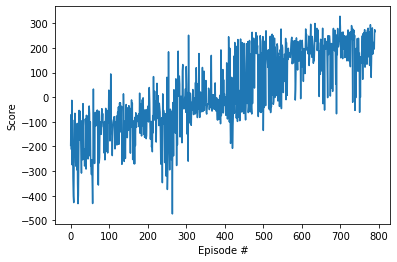

In [10]:
# Plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [12]:
# Whatch a Smart Agent
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(3):
    state = env.reset()
    for j in range(600):
        action = agent.act(state)
        env.render()
        state, reward, done, _ = env.step(action)
        if done:
            break
            
env.close()